<a href="https://colab.research.google.com/github/MoBanerjee/InternshipAssignments/blob/main/fabricanomalyunsuperviseddetectionusingsegmentationandmasking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

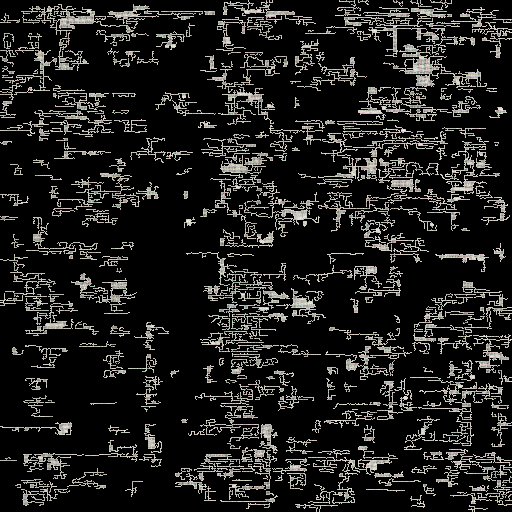

In [60]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def detect_defect(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize a mask for the defective region
    mask = np.zeros_like(gray_image)

    # Loop over the contours
    for contour in contours:
        # Calculate the area of the contour
        area = cv2.contourArea(contour)

        # If the area is small (potentially a defect), draw it on the mask
        if area < 1000:
            cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)

    # Bitwise AND the original image and the mask to get the defective region
    result = cv2.bitwise_and(image, image, mask=mask)

    # Show the result
    cv2_imshow(result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
image_path = '/content/Fabric1.jpg'
detect_defect(image_path)

In [61]:
choice=""
while(choice!='a'):
  choice = input('Enter image path (enter "a" to end program)-: \n')
  print("\n")
  if(choice!="a"):
    detect_defect(choice)
  print("\n")


Enter image path (enter "a" to end program)-: 
a




